In [0]:
import os
import pandas as pd
import numpy as np
from datetime import datetime, date, timedelta
from sklearn.metrics import mean_absolute_error
import itertools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

## Load data

In [0]:
path = "/dbfs/FileStore/datasets/eco2mix_conso_bretagne.csv"

df = pd.read_csv(path, delimiter=";")
df['DateHeure'] = pd.to_datetime(df['DateHeure'], format='%Y-%m-%d %H:%M:%S.%f')

df_hourly = df[['DateHeure', 'Consommation']]
df_hourly.columns = ['ds','y']

# remove region, group by day
df['Date'] = df['DateHeure'].dt.date
df_day = df[['Date','Consommation']].groupby(by='Date', dropna=False).sum().reset_index()
df_day.columns = ['ds','y']

df_day['ds'] = pd.to_datetime(df_day['ds'])

datemin = df_day['ds'].min()
datemax = df_day['ds'].max()
print(f"Dataset is starting on {datemin}")
print(f"Dataset is ending on {datemax}")
print(df_day.shape)
df_day.head()

Dataset is starting on 2013-01-01 00:00:00
Dataset is ending on 2021-06-30 00:00:00
(3103, 2)
Out[2]:

,ds,y
0,2013-01-01,121979.0
1,2013-01-02,153379.0
2,2013-01-03,151563.0
3,2013-01-04,150836.0
4,2013-01-05,137267.0


<command-2910699353414450>:2: RuntimeWarning: Second argument 'y' is ambiguous: could be a format string but is in 'data'; using as data. If it was intended as data, set the format string to an empty string to suppress this warning. If it was intended as a format string, explicitly pass the x-values as well. Alternatively, rename the entry in 'data'.
 ax.plot('ds', 'y', data=df_day)

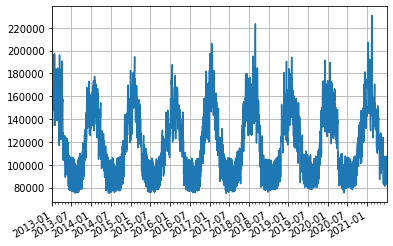

In [0]:
fig, ax = plt.subplots()
ax.plot('ds', 'y', data=df_day)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=6)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

# Round to nearest years.
# datemin = np.datetime64(df_day['ds'][0], 'Y')
# datemax = np.datetime64(df_day['ds'][-1], 'Y') + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

# Format the coords message box, i.e. the numbers displayed as the cursor moves
# across the axes within the interactive GUI.
ax.format_xdata = mdates.DateFormatter('%Y-%m')
ax.format_ydata = lambda x: f'${x:.2f}'  # Format the price.
ax.grid(True)

# Rotates and right aligns the x labels, and moves the bottom of the
# axes up to make room for them.
fig.autofmt_xdate()

plt.show()


## Neural prophet

In [0]:
%sh pip install neuralprophet

Requirement already satisfied: neuralprophet in /databricks/python3/lib/python3.8/site-packages (0.2.8)
Requirement already satisfied: attrdict>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (2.0.1)
Requirement already satisfied: ipywidgets>=7.5.1 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (7.6.3)
Requirement already satisfied: matplotlib>=2.0.0 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (3.4.2)
Requirement already satisfied: LunarCalendar>=0.0.9 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (0.0.9)
Requirement already satisfied: holidays>=0.11.3.1 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (0.11.3.1)
Requirement already satisfied: numpy>=1.15.4 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (1.19.2)
Requirement already satisfied: pandas>=1.0.4 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (1.2.4)
Requirement already satisfied: convertdate>=2.1.2 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (2.3.2)
Requirement already satisfied: tqdm>=4.50.2 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (4.59.0)
Requirement already satisfied: dataclasses>=0.6 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (0.6)
Requirement already satisfied: torch>=1.4.0 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (1.9.0+cpu)
Requirement already satisfied: torch-lr-finder>=0.2.1 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (0.2.1)
Requirement already satisfied: python-dateutil>=2.8.0 in /databricks/python3/lib/python3.8/site-packages (from neuralprophet) (2.8.1)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from attrdict>=2.0.1->neuralprophet) (1.15.0)
Requirement already satisfied: pytz>=2014.10 in /databricks/python3/lib/python3.8/site-packages (from convertdate>=2.1.2->neuralprophet) (2020.5)
Requirement already satisfied: pymeeus<=1,>=0.3.13 in /databricks/python3/lib/python3.8/site-packages (from convertdate>=2.1.2->neuralprophet) (0.5.11)
Requirement already satisfied: hijri-converter in /databricks/python3/lib/python3.8/site-packages (from holidays>=0.11.3.1->neuralprophet) (2.2.1)
Requirement already satisfied: korean-lunar-calendar in /databricks/python3/lib/python3.8/site-packages (from holidays>=0.11.3.1->neuralprophet) (0.2.1)
Requirement already satisfied: traitlets>=4.3.1 in /databricks/python3/lib/python3.8/site-packages (from ipywidgets>=7.5.1->neuralprophet) (5.0.5)
Requirement already satisfied: nbformat>=4.2.0 in /databricks/python3/lib/python3.8/site-packages (from ipywidgets>=7.5.1->neuralprophet) (5.1.3)
Requirement already satisfied: ipython>=4.0.0 in /databricks/python3/lib/python3.8/site-packages (from ipywidgets>=7.5.1->neuralprophet) (7.22.0)
Requirement already satisfied: widgetsnbextension~=3.5.0 in /databricks/python3/lib/python3.8/site-packages (from ipywidgets>=7.5.1->neuralprophet) (3.5.1)
Requirement already satisfied: ipykernel>=4.5.1 in /databricks/python3/lib/python3.8/site-packages (from ipywidgets>=7.5.1->neuralprophet) (5.3.4)
Requirement already satisfied: jupyterlab-widgets>=1.0.0 in /databricks/python3/lib/python3.8/site-packages (from ipywidgets>=7.5.1->neuralprophet) (1.0.0)
Requirement already satisfied: tornado>=4.2 in /databricks/python3/lib/python3.8/site-packages (from ipykernel>=4.5.1->ipywidgets>=7.5.1->neuralprophet) (6.1)
Requirement already satisfied: jupyter-client in /databricks/python3/lib/python3.8/site-packages (from ipykernel>=4.5.1->ipywidgets>=7.5.1->neuralprophet) (6.1.12)
Requirement already satisfied: backcall in /databricks/python3/lib/python3.8/site-packages (from ipython>=4.0.0->ipywidgets>=7.5.1->neuralprophet) (0.2.0)
Requirement already satisfied: prompt-toolkit!=3.0.0,!=3.0.1,<3.1.0,>=2.0.0 in /databricks/python3/lib/python3.

In [0]:
from neuralprophet import NeuralProphet

In [0]:
df_day.tail()

Out[6]:

,ds,y
3098,2021-06-26,91685.0
3099,2021-06-27,83933.0
3100,2021-06-28,103951.0
3101,2021-06-29,107564.0
3102,2021-06-30,107500.0


#### Train Neural Prophet 'like' a fb prophet

In [0]:
train_test_limit = datetime(2019, 1, 1)

In [0]:
# Neural prophet without AR = fb prophet
n_lags = 0
n_forecasts = 1
df_train = df_day[df_day['ds'] < train_test_limit][['ds', 'y']]
df_test = df_day[df_day['ds'] >= train_test_limit][['ds', 'y']]
print(df_train.shape)
print(df_train.ds.min())
print(df_test.ds.min())

m = NeuralProphet(n_lags=n_lags, 
                  n_forecasts=n_forecasts, 
                  n_changepoints=7)
m.add_country_holidays(country_name='FR')
m.fit(df_train, freq='D')
m.test(df_test)

(2191, 2)
2013-01-01 00:00:00
2019-01-01 00:00:00
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 149
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.65E-02, min: 8.63E-01
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.48E-01
 0%| | 0/149 [00:00<?, ?it/s]Epoch[1/149]: 0%| | 0/149 [00:00<?, ?it/s]Epoch[1/149]: 0%| | 0/149 [00:00<?, ?it/s, SmoothL1Loss=1.13, MAE=1.54e+5, MSE=3.6e+10, RegLoss=0]Epoch[1/149]: 1%| | 1/149 [00:00<00:25, 5.87it/s, SmoothL1Loss=1.13, MAE=1.54e+5, MSE=3.6e+10, RegLoss=0]Epoch[2/149]: 1%| | 1/149 [00:00<00:25, 5.87it/s, SmoothL1Loss=1.13, MAE=1.54e+5, MSE=3.6e+10, RegLoss=0]Epoch[2/149]: 1%| | 1/149 [00:00<00:25, 5.87it/s, SmoothL1Loss=0.658, MAE=1.04e+5, MSE=1.72e+10, RegLoss=0]Epoch[2/149]: 1%|▏ | 2/149 [00:00<00:25, 5.86it/s, SmoothL1Loss=0.658, MAE=1.04e+5, MSE=1.72e+10, RegLoss=0]Epoch[3/149]: 1%|▏ | 2/149 [00:00<00:25, 5.86it/s, SmoothL1Loss=0.658, MAE=1.04e+5, MSE=1.72e+10, RegLoss=0]Epoch[3/149]: 1%|▏ | 2/149 [00:00<00:25, 5.86it/s, SmoothL1Loss=0.25, MAE=5.69e+4, MSE=5.26e+9, RegLoss=0] Epoch[3/149]: 2%|▏ | 3/149 [00:00<00:24, 5.90it/s, SmoothL1Loss=0.25, MAE=5.69e+4, MSE=5.26e+9, RegLoss=0]Epoch[4/149]: 2%|▏ | 3/149 [00:00<00:24, 5.90it/s, SmoothL1Loss=0.25, MAE=5.69e+4, MSE=5.26e+9, RegLoss=0]Epoch[4/149]: 2%|▏ | 3/149 [00:00<00:24, 5.90it/s, SmoothL1Loss=0.0705, MAE=3.08e+4, MSE=1.37e+9, RegLoss=0]Epoch[4/149]: 3%|▎ | 4/149 [00:00<00:24, 5.98it/s, SmoothL1Loss=0.0705, MAE=3.08e+4, MSE=1.37e+9, RegLoss=0]Epoch[5/149]: 3%|▎ | 4/149 [00:00<00:24, 5.98it/s, SmoothL1Loss=0.0705, MAE=3.08e+4, MSE=1.37e+9, RegLoss=0]Epoch[5/149]: 3%|▎ | 4/149 [00:00<00:24, 5.98it/s, SmoothL1Loss=0.032, MAE=2.02e+4, MSE=6.19e+8, RegLoss=0] Epoch[5/149]: 3%|▎ | 5/149 [00:00<00:24, 5.93it/s, SmoothL1Loss=0.032, MAE=2.02e+4, MSE=6.19e+8, RegLoss=0]Epoch[6/149]: 3%|▎ | 5/149 [00:01<00:24, 5.93it/s, SmoothL1Loss=0.032, MAE=2.02e+4, MSE=6.19e+8, RegLoss=0]Epoch[6/149]: 3%|▎ | 5/149 [00:01<00:24, 5.93it/s, SmoothL1Loss=0.016, MAE=1.4e+4, MSE=3.1e+8, RegLoss=0] Epoch[6/149]: 4%|▍ | 6/149 [00:01<00:24, 5.89it/s, SmoothL1Loss=0.016, MAE=1.4e+4, MSE=3.1e+8, RegLoss=0]Epoch[7/149]: 4%|▍ | 6/149 [00:01<00:24, 5.89it/s, SmoothL1Loss=0.016, MAE=1.4e+4, MSE=3.1e+8, RegLoss=0]Epoch[7/149]: 4%|▍ | 6/149 [00:01<00:24, 5.89it/s, SmoothL1Loss=0.00971, MAE=1.06e+4, MSE=1.88e+8, RegLoss=0]Epoch[7/149]: 5%|▍ | 7/149 [00:01<00:24, 5.92it/s, SmoothL1Loss=0.00971, MAE=1.06e+4, MSE=1.88e+8, RegLoss=0]Epoch[8/149]: 5%|▍ | 7/149 [00:01<00:24, 5.92it/s, SmoothL1Loss=0.00971, MAE=1.06e+4, MSE=1.88e+8, RegLoss=0]Epoch[8/149]: 5%|▍ | 7/149 [00:01<00:24, 5.92it/s, SmoothL1Loss=0.00744, MAE=9.1e+3, MSE=1.44e+8, RegLoss=0] Epoch[8/149]: 5%|▌ | 8/149 [00:01<00:23, 5.91it/s, SmoothL1Loss=0.00744, MAE=9.1e+3, MSE=1.44e+8, RegLoss=0]Epoch[9/149]: 5%|▌ | 8/149 [00:01<00:23, 5.91it/s, SmoothL1Loss=0.00744, MAE=9.1e+3, MSE=1.44e+8, RegLoss=0]Epoch[9/149]: 5%|▌ | 8/149 [00:01<00:23, 5.91it/s, SmoothL1Loss=0.00676, MAE=8.36e+3, MSE=1.31e+8, RegLoss=0]Epoch[9/149]: 6%|▌ | 9/149 [00:01<00:23, 5.86it/s, SmoothL1Loss=0.00676, MAE=8.36e+3, MSE=1.31e+8, RegLoss=0]Epoch[10/149]: 6%|▌ | 9/149 [00:01<00:23, 5.86it/s, SmoothL1Loss=0.00676, MAE=8.36e+3, MSE=1.31e+8, RegLoss=0]Epoch[10/149]: 6%|▌ | 9/149 [00:01<00:23, 5.86it/s, SmoothL1Loss=0.00598, MAE=7.69e+3, MSE=1.16e+8, RegLoss=0]Epoch[10/149]: 7%|▋ | 10/149 [00:01<00:23, 5.87it/s, SmoothL1Loss=0.00598, MAE=7.69e+3, MSE=1.16e+8, RegLoss=0]Epoch[11/149]: 7%|▋ | 10/149 [00:01<00:23, 5.87it/s, SmoothL1Loss=0.00598, MAE=7.69e+3, MSE=1.16e+8, RegLoss=0]Epoch[11/149]: 7%|▋ | 10/149 [00:01<00:23, 5.87it/s, SmoothL1Loss=0.00592, MAE=7.61e+3, MSE=1.14e+8, RegLoss=0]Epoch[11/149]: 7%|▋ | 11/149 [00:01<00:23, 5.84it/s, SmoothL

,SmoothL1Loss,MAE,MSE
0,0.007504,8615.249023,145129952.0


#### Neural prophet with AR_Net(0)
- n_lags = 3
- n_forecast = 1

![test](files/tables/ARNET_0.png)

In [0]:
n_lags = 3
n_forecasts = 1
df_train = df_day[df_day['ds'] < train_test_limit][['ds', 'y']]
df_test = df_day[df_day['ds'] >= train_test_limit-timedelta(days=n_lags)][['ds', 'y']]
print(df_train.shape)
print(df_train.ds.min())
print(df_test.ds.min())

m = NeuralProphet(n_lags=n_lags, n_forecasts=n_forecasts)
m.add_country_holidays(country_name='FR')
m.fit(df_train, freq='D')
m.test(df_test)

(2191, 2)
2013-01-01 00:00:00
2018-12-29 00:00:00
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 149
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 5.22E-02, min: 1.38E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 4.63E-01
 0%| | 0/149 [00:00<?, ?it/s]Epoch[1/149]: 0%| | 0/149 [00:00<?, ?it/s]Epoch[1/149]: 0%| | 0/149 [00:00<?, ?it/s, SmoothL1Loss=2.15, MAE=2.58e+5, MSE=8.85e+10, RegLoss=0]Epoch[1/149]: 1%| | 1/149 [00:00<00:28, 5.21it/s, SmoothL1Loss=2.15, MAE=2.58e+5, MSE=8.85e+10, RegLoss=0]Epoch[2/149]: 1%| | 1/149 [00:00<00:28, 5.21it/s, SmoothL1Loss=2.15, MAE=2.58e+5, MSE=8.85e+10, RegLoss=0]Epoch[2/149]: 1%| | 1/149 [00:00<00:28, 5.21it/s, SmoothL1Loss=1.05, MAE=1.46e+5, MSE=3.33e+10, RegLoss=0]Epoch[2/149]: 1%|▏ | 2/149 [00:00<00:27, 5.29it/s, SmoothL1Loss=1.05, MAE=1.46e+5, MSE=3.33e+10, RegLoss=0]Epoch[3/149]: 1%|▏ | 2/149 [00:00<00:27, 5.29it/s, SmoothL1Loss=1.05, MAE=1.46e+5, MSE=3.33e+10, RegLoss=0]Epoch[3/149]: 1%|▏ | 2/149 [00:00<00:27, 5.29it/s, SmoothL1Loss=0.25, MAE=5.63e+4, MSE=5.54e+9, RegLoss=0] Epoch[3/149]: 2%|▏ | 3/149 [00:00<00:26, 5.42it/s, SmoothL1Loss=0.25, MAE=5.63e+4, MSE=5.54e+9, RegLoss=0]Epoch[4/149]: 2%|▏ | 3/149 [00:00<00:26, 5.42it/s, SmoothL1Loss=0.25, MAE=5.63e+4, MSE=5.54e+9, RegLoss=0]Epoch[4/149]: 2%|▏ | 3/149 [00:00<00:26, 5.42it/s, SmoothL1Loss=0.0735, MAE=3.12e+4, MSE=1.42e+9, RegLoss=0]Epoch[4/149]: 3%|▎ | 4/149 [00:00<00:26, 5.46it/s, SmoothL1Loss=0.0735, MAE=3.12e+4, MSE=1.42e+9, RegLoss=0]Epoch[5/149]: 3%|▎ | 4/149 [00:00<00:26, 5.46it/s, SmoothL1Loss=0.0735, MAE=3.12e+4, MSE=1.42e+9, RegLoss=0]Epoch[5/149]: 3%|▎ | 4/149 [00:00<00:26, 5.46it/s, SmoothL1Loss=0.0302, MAE=1.89e+4, MSE=5.83e+8, RegLoss=0]Epoch[5/149]: 3%|▎ | 5/149 [00:00<00:26, 5.44it/s, SmoothL1Loss=0.0302, MAE=1.89e+4, MSE=5.83e+8, RegLoss=0]Epoch[6/149]: 3%|▎ | 5/149 [00:01<00:26, 5.44it/s, SmoothL1Loss=0.0302, MAE=1.89e+4, MSE=5.83e+8, RegLoss=0]Epoch[6/149]: 3%|▎ | 5/149 [00:01<00:26, 5.44it/s, SmoothL1Loss=0.0114, MAE=1.09e+4, MSE=2.21e+8, RegLoss=0]Epoch[6/149]: 4%|▍ | 6/149 [00:01<00:26, 5.41it/s, SmoothL1Loss=0.0114, MAE=1.09e+4, MSE=2.21e+8, RegLoss=0]Epoch[7/149]: 4%|▍ | 6/149 [00:01<00:26, 5.41it/s, SmoothL1Loss=0.0114, MAE=1.09e+4, MSE=2.21e+8, RegLoss=0]Epoch[7/149]: 4%|▍ | 6/149 [00:01<00:26, 5.41it/s, SmoothL1Loss=0.00711, MAE=8.63e+3, MSE=1.37e+8, RegLoss=0]Epoch[7/149]: 5%|▍ | 7/149 [00:01<00:26, 5.37it/s, SmoothL1Loss=0.00711, MAE=8.63e+3, MSE=1.37e+8, RegLoss=0]Epoch[8/149]: 5%|▍ | 7/149 [00:01<00:26, 5.37it/s, SmoothL1Loss=0.00711, MAE=8.63e+3, MSE=1.37e+8, RegLoss=0]Epoch[8/149]: 5%|▍ | 7/149 [00:01<00:26, 5.37it/s, SmoothL1Loss=0.00604, MAE=7.98e+3, MSE=1.17e+8, RegLoss=0]Epoch[8/149]: 5%|▌ | 8/149 [00:01<00:25, 5.43it/s, SmoothL1Loss=0.00604, MAE=7.98e+3, MSE=1.17e+8, RegLoss=0]Epoch[9/149]: 5%|▌ | 8/149 [00:01<00:25, 5.43it/s, SmoothL1Loss=0.00604, MAE=7.98e+3, MSE=1.17e+8, RegLoss=0]Epoch[9/149]: 5%|▌ | 8/149 [00:01<00:25, 5.43it/s, SmoothL1Loss=0.00559, MAE=7.57e+3, MSE=1.08e+8, RegLoss=0]Epoch[9/149]: 6%|▌ | 9/149 [00:01<00:26, 5.38it/s, SmoothL1Loss=0.00559, MAE=7.57e+3, MSE=1.08e+8, RegLoss=0]Epoch[10/149]: 6%|▌ | 9/149 [00:01<00:26, 5.38it/s, SmoothL1Loss=0.00559, MAE=7.57e+3, MSE=1.08e+8, RegLoss=0]Epoch[10/149]: 6%|▌ | 9/149 [00:01<00:26, 5.38it/s, SmoothL1Loss=0.00488, MAE=7.01e+3, MSE=9.43e+7, RegLoss=0]Epoch[10/149]: 7%|▋ | 10/149 [00:01<00:25, 5.38it/s, SmoothL1Loss=0.00488, MAE=7.01e+3, MSE=9.43e+7, RegLoss=0]Epoch[11/149]: 7%|▋ | 10/149 [00:02<00:25, 5.38it/s, SmoothL1Loss=0.00488, MAE=7.01e+3, MSE=9.43e+7, RegLoss=0]Epoch[11/149]: 7%|▋ | 10/149 [00:02<00:25, 5.38it/s, SmoothL1Loss=0.00481, MAE=7.11e+3, MSE=9.31e+7, RegLoss=0]Epoch[11/149]: 7%|▋ | 11/149 [00:02<00:25, 5.33i

,SmoothL1Loss,MAE,MSE
0,0.001976,4510.193848,38218380.0


Out[10]:

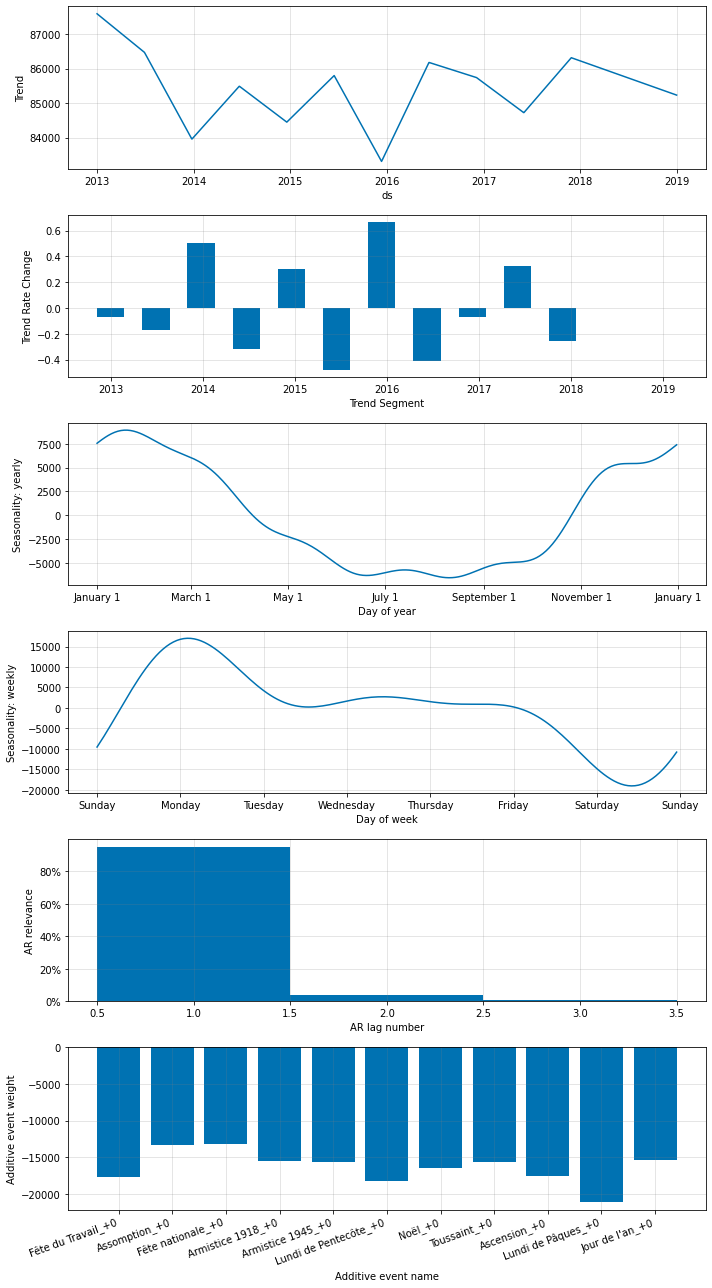

<Figure size 720x1296 with 6 Axes>

In [0]:
m.plot_parameters()

#### Neural prophet with AR_Net(1)
- n_lags =3
- n_forecast = 1
- num_hidden_layers = 1

![test](files/tables/ARNET_1.png)

In [0]:
n_lags = 3
n_forecasts = 1
df_train = df_day[df_day['ds'] < train_test_limit][['ds', 'y']]
df_test = df_day[df_day['ds'] >= train_test_limit-timedelta(days=n_lags)][['ds', 'y']]
print(df_train.shape)
print(df_train.ds.min())
print(df_test.ds.min())

m = NeuralProphet(n_lags=n_lags, 
                  n_forecasts=n_forecasts, 
                  num_hidden_layers=1, 
                  d_hidden=10)
m.add_country_holidays(country_name='FR')
m.fit(df_train, freq='D')
m.test(df_test)

(2191, 2)
2013-01-01 00:00:00
2018-12-29 00:00:00
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 149
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 4.83E-02, min: 1.01E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 3.66E-01
 0%| | 0/149 [00:00<?, ?it/s]Epoch[1/149]: 0%| | 0/149 [00:00<?, ?it/s]Epoch[1/149]: 0%| | 0/149 [00:00<?, ?it/s, SmoothL1Loss=0.743, MAE=1.14e+5, MSE=2.05e+10, RegLoss=0]Epoch[1/149]: 1%| | 1/149 [00:00<00:29, 4.96it/s, SmoothL1Loss=0.743, MAE=1.14e+5, MSE=2.05e+10, RegLoss=0]Epoch[2/149]: 1%| | 1/149 [00:00<00:29, 4.96it/s, SmoothL1Loss=0.743, MAE=1.14e+5, MSE=2.05e+10, RegLoss=0]Epoch[2/149]: 1%| | 1/149 [00:00<00:29, 4.96it/s, SmoothL1Loss=0.315, MAE=6.52e+4, MSE=6.92e+9, RegLoss=0] Epoch[2/149]: 1%|▏ | 2/149 [00:00<00:29, 4.96it/s, SmoothL1Loss=0.315, MAE=6.52e+4, MSE=6.92e+9, RegLoss=0]Epoch[3/149]: 1%|▏ | 2/149 [00:00<00:29, 4.96it/s, SmoothL1Loss=0.315, MAE=6.52e+4, MSE=6.92e+9, RegLoss=0]Epoch[3/149]: 1%|▏ | 2/149 [00:00<00:29, 4.96it/s, SmoothL1Loss=0.0772, MAE=3.02e+4, MSE=1.5e+9, RegLoss=0]Epoch[3/149]: 2%|▏ | 3/149 [00:00<00:30, 4.86it/s, SmoothL1Loss=0.0772, MAE=3.02e+4, MSE=1.5e+9, RegLoss=0]Epoch[4/149]: 2%|▏ | 3/149 [00:00<00:30, 4.86it/s, SmoothL1Loss=0.0772, MAE=3.02e+4, MSE=1.5e+9, RegLoss=0]Epoch[4/149]: 2%|▏ | 3/149 [00:00<00:30, 4.86it/s, SmoothL1Loss=0.012, MAE=1.1e+4, MSE=2.32e+8, RegLoss=0] Epoch[4/149]: 3%|▎ | 4/149 [00:00<00:29, 4.87it/s, SmoothL1Loss=0.012, MAE=1.1e+4, MSE=2.32e+8, RegLoss=0]Epoch[5/149]: 3%|▎ | 4/149 [00:01<00:29, 4.87it/s, SmoothL1Loss=0.012, MAE=1.1e+4, MSE=2.32e+8, RegLoss=0]Epoch[5/149]: 3%|▎ | 4/149 [00:01<00:29, 4.87it/s, SmoothL1Loss=0.0062, MAE=7.63e+3, MSE=1.2e+8, RegLoss=0]Epoch[5/149]: 3%|▎ | 5/149 [00:01<00:29, 4.90it/s, SmoothL1Loss=0.0062, MAE=7.63e+3, MSE=1.2e+8, RegLoss=0]Epoch[6/149]: 3%|▎ | 5/149 [00:01<00:29, 4.90it/s, SmoothL1Loss=0.0062, MAE=7.63e+3, MSE=1.2e+8, RegLoss=0]Epoch[6/149]: 3%|▎ | 5/149 [00:01<00:29, 4.90it/s, SmoothL1Loss=0.00383, MAE=6.17e+3, MSE=7.41e+7, RegLoss=0]Epoch[6/149]: 4%|▍ | 6/149 [00:01<00:29, 4.83it/s, SmoothL1Loss=0.00383, MAE=6.17e+3, MSE=7.41e+7, RegLoss=0]Epoch[7/149]: 4%|▍ | 6/149 [00:01<00:29, 4.83it/s, SmoothL1Loss=0.00383, MAE=6.17e+3, MSE=7.41e+7, RegLoss=0]Epoch[7/149]: 4%|▍ | 6/149 [00:01<00:29, 4.83it/s, SmoothL1Loss=0.00267, MAE=5.26e+3, MSE=5.17e+7, RegLoss=0]Epoch[7/149]: 5%|▍ | 7/149 [00:01<00:29, 4.82it/s, SmoothL1Loss=0.00267, MAE=5.26e+3, MSE=5.17e+7, RegLoss=0]Epoch[8/149]: 5%|▍ | 7/149 [00:01<00:29, 4.82it/s, SmoothL1Loss=0.00267, MAE=5.26e+3, MSE=5.17e+7, RegLoss=0]Epoch[8/149]: 5%|▍ | 7/149 [00:01<00:29, 4.82it/s, SmoothL1Loss=0.00223, MAE=4.74e+3, MSE=4.31e+7, RegLoss=0]Epoch[8/149]: 5%|▌ | 8/149 [00:01<00:29, 4.78it/s, SmoothL1Loss=0.00223, MAE=4.74e+3, MSE=4.31e+7, RegLoss=0]Epoch[9/149]: 5%|▌ | 8/149 [00:01<00:29, 4.78it/s, SmoothL1Loss=0.00223, MAE=4.74e+3, MSE=4.31e+7, RegLoss=0]Epoch[9/149]: 5%|▌ | 8/149 [00:01<00:29, 4.78it/s, SmoothL1Loss=0.00196, MAE=4.37e+3, MSE=3.8e+7, RegLoss=0] Epoch[9/149]: 6%|▌ | 9/149 [00:01<00:28, 4.86it/s, SmoothL1Loss=0.00196, MAE=4.37e+3, MSE=3.8e+7, RegLoss=0]Epoch[10/149]: 6%|▌ | 9/149 [00:02<00:28, 4.86it/s, SmoothL1Loss=0.00196, MAE=4.37e+3, MSE=3.8e+7, RegLoss=0]Epoch[10/149]: 6%|▌ | 9/149 [00:02<00:28, 4.86it/s, SmoothL1Loss=0.00224, MAE=4.72e+3, MSE=4.33e+7, RegLoss=0]Epoch[10/149]: 7%|▋ | 10/149 [00:02<00:28, 4.92it/s, SmoothL1Loss=0.00224, MAE=4.72e+3, MSE=4.33e+7, RegLoss=0]Epoch[11/149]: 7%|▋ | 10/149 [00:02<00:28, 4.92it/s, SmoothL1Loss=0.00224, MAE=4.72e+3, MSE=4.33e+7, RegLoss=0]Epoch[11/149]: 7%|▋ | 10/149 [00:02<00:28, 4.92it/s, SmoothL1Loss=0.00249, MAE=4.97e+3, MSE=4.81e+7, RegLoss=0]Epoch[11/149]: 7%|▋ | 11/149 [00:02<00:27, 4.94it

,SmoothL1Loss,MAE,MSE
0,0.009441,10338.615234,182582576.0


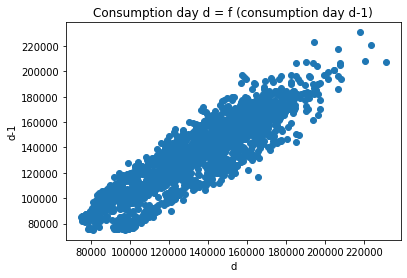

In [0]:
df_day_cp = df_day.copy()
df_day_cp['y_d1'] = df_day_cp['y'].shift()
plt.scatter(df_day_cp.y, df_day_cp.y_d1)
plt.title("Consumption day d = f (consumption day d-1)")
plt.xlabel("d")
plt.ylabel("d-1")
plt.show()

#### Neural Prophet with forecast horizon > 1
- ARNet(0)
- n_lags : 3
- n_forecast = 2

![test](files/tables/ARNET_0_2.png)

In [0]:
# avec un horizon > 1
n_lags = 3
n_forecasts = 2
df_train = df_day[df_day['ds'] < train_test_limit][['ds', 'y']]
df_test = df_day[df_day['ds'] >= train_test_limit-timedelta(days=n_lags)][['ds', 'y']]
print(df_train.shape)
print(df_train.ds.min())
print(df_test.ds.min())

m = NeuralProphet(n_lags=n_lags, 
                  n_forecasts=n_forecasts, 
                  n_changepoints=7,
                  train_speed=1)
m.add_country_holidays(country_name='FR')
m.fit(df_train, freq='D')

future = m.make_future_dataframe(df_train, n_historic_predictions=True)
forecast = m.predict(future)
forecast.head(10)

(2191, 2)
2013-01-01 00:00:00
2018-12-29 00:00:00
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 149
INFO - (NP.config.apply_train_speed) - train_speed-1 increased batch_size to 64
INFO - (NP.config.apply_train_speed) - train_speed-1 decreased epochs to 74
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 2.12E-01, min: 1.49E+00
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 7.78E-01
INFO - (NP.config.apply_train_speed) - train_speed-1 increased learning_rate to 1.5559922848386294
 0%| | 0/74 [00:00<?, ?it/s]Epoch[1/74]: 0%| | 0/74 [00:00<?, ?it/s]Epoch[1/74]: 0%| | 0/74 [00:00<?, ?it/s, SmoothL1Loss=0.736, MAE=1.12e+5, MSE=2.15e+10, RegLoss=0]Epoch[1/74]: 1%|▏ | 1/74 [00:00<00:08, 8.51it/s, SmoothL1Loss=0.736, MAE=1.12e+5, MSE=2.15e+10, RegLoss=0]Epoch[2/74]: 1%|▏ | 1/74 [00:00<00:08, 8.51it/s, SmoothL1Loss=0.736, MAE=1.12e+5, MSE=2.15e+10, RegLoss=0]Epoch[2/74]: 1%|▏ | 1/74 [00:00<00:08, 8.51it/s, SmoothL1Loss=0.168, MAE=4.66e+4, MSE=3.32e+9, RegLoss=0] Epoch[2/74]: 3%|▎ | 2/74 [00:00<00:08, 8.50it/s, SmoothL1Loss=0.168, MAE=4.66e+4, MSE=3.32e+9, RegLoss=0]Epoch[3/74]: 3%|▎ | 2/74 [00:00<00:08, 8.50it/s, SmoothL1Loss=0.168, MAE=4.66e+4, MSE=3.32e+9, RegLoss=0]Epoch[3/74]: 3%|▎ | 2/74 [00:00<00:08, 8.50it/s, SmoothL1Loss=0.039, MAE=2.15e+4, MSE=7.55e+8, RegLoss=0]Epoch[3/74]: 4%|▍ | 3/74 [00:00<00:08, 8.49it/s, SmoothL1Loss=0.039, MAE=2.15e+4, MSE=7.55e+8, RegLoss=0]Epoch[4/74]: 4%|▍ | 3/74 [00:00<00:08, 8.49it/s, SmoothL1Loss=0.039, MAE=2.15e+4, MSE=7.55e+8, RegLoss=0]Epoch[4/74]: 4%|▍ | 3/74 [00:00<00:08, 8.49it/s, SmoothL1Loss=0.0157, MAE=1.37e+4, MSE=3.03e+8, RegLoss=0]Epoch[4/74]: 5%|▌ | 4/74 [00:00<00:08, 8.47it/s, SmoothL1Loss=0.0157, MAE=1.37e+4, MSE=3.03e+8, RegLoss=0]Epoch[5/74]: 5%|▌ | 4/74 [00:00<00:08, 8.47it/s, SmoothL1Loss=0.0157, MAE=1.37e+4, MSE=3.03e+8, RegLoss=0]Epoch[5/74]: 5%|▌ | 4/74 [00:00<00:08, 8.47it/s, SmoothL1Loss=0.00701, MAE=8.9e+3, MSE=1.36e+8, RegLoss=0]Epoch[5/74]: 7%|▋ | 5/74 [00:00<00:08, 8.45it/s, SmoothL1Loss=0.00701, MAE=8.9e+3, MSE=1.36e+8, RegLoss=0]Epoch[6/74]: 7%|▋ | 5/74 [00:00<00:08, 8.45it/s, SmoothL1Loss=0.00701, MAE=8.9e+3, MSE=1.36e+8, RegLoss=0]Epoch[6/74]: 7%|▋ | 5/74 [00:00<00:08, 8.45it/s, SmoothL1Loss=0.00536, MAE=7.79e+3, MSE=1.04e+8, RegLoss=0]Epoch[6/74]: 8%|▊ | 6/74 [00:00<00:07, 8.50it/s, SmoothL1Loss=0.00536, MAE=7.79e+3, MSE=1.04e+8, RegLoss=0]Epoch[7/74]: 8%|▊ | 6/74 [00:00<00:07, 8.50it/s, SmoothL1Loss=0.00536, MAE=7.79e+3, MSE=1.04e+8, RegLoss=0]Epoch[7/74]: 8%|▊ | 6/74 [00:00<00:07, 8.50it/s, SmoothL1Loss=0.00569, MAE=8.08e+3, MSE=1.1e+8, RegLoss=0] Epoch[7/74]: 9%|▉ | 7/74 [00:00<00:07, 8.41it/s, SmoothL1Loss=0.00569, MAE=8.08e+3, MSE=1.1e+8, RegLoss=0]Epoch[8/74]: 9%|▉ | 7/74 [00:00<00:07, 8.41it/s, SmoothL1Loss=0.00569, MAE=8.08e+3, MSE=1.1e+8, RegLoss=0]Epoch[8/74]: 9%|▉ | 7/74 [00:00<00:07, 8.41it/s, SmoothL1Loss=0.00992, MAE=1.02e+4, MSE=1.92e+8, RegLoss=0]Epoch[8/74]: 11%|█ | 8/74 [00:00<00:07, 8.34it/s, SmoothL1Loss=0.00992, MAE=1.02e+4, MSE=1.92e+8, RegLoss=0]Epoch[9/74]: 11%|█ | 8/74 [00:01<00:07, 8.34it/s, SmoothL1Loss=0.00992, MAE=1.02e+4, MSE=1.92e+8, RegLoss=0]Epoch[9/74]: 11%|█ | 8/74 [00:01<00:07, 8.34it/s, SmoothL1Loss=0.0172, MAE=1.39e+4, MSE=3.32e+8, RegLoss=0] Epoch[9/74]: 12%|█▏ | 9/74 [00:01<00:07, 8.37it/s, SmoothL1Loss=0.0172, MAE=1.39e+4, MSE=3.32e+8, RegLoss=0]Epoch[10/74]: 12%|█▏ | 9/74 [00:01<00:07, 8.37it/s, SmoothL1Loss=0.0172, MAE=1.39e+4, MSE=3.32e+8, RegLoss=0]Epoch[10/74]: 12%|█▏ | 9/74 [00:01<00:07, 8.37it/s, SmoothL1Loss=0.0313, MAE=1.9e+4, MSE=6.12e+8, RegLoss=0] Epoch[10/74]: 14%|█▎ | 10/74 [00:01<00:07, 8.43it/s, SmoothL1Loss=0.0313, MAE=1.9e+4, MSE=6.12e+8, RegLoss=0]Epoch[11/74]: 14%|█▎ | 10/74 [00:01<00:07, 8.43it/s, SmoothL1L

,ds,y,yhat1,residual1,yhat2,residual2,ar1,ar2,trend,season_yearly,season_weekly,events_additive,event_Armistice 1918,event_Armistice 1945,event_Ascension,event_Assomption,event_Fête du Travail,event_Fête nationale,event_Jour de l'an,event_Lundi de Pentecôte,event_Lundi de Pâques,event_Noël,event_Toussaint
0,2013-01-01,121979.0,None,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,2013-01-02,153379.0,None,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,2013-01-03,151563.0,None,NaN,None,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,2013-01-04,150836.0,160169.34375,9333.34375,None,NaN,52322.503906,None,95049.421875,11744.141602,1053.272949,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2013-01-05,137267.0,143864.546875,6597.546875,140825.640625,3558.640625,51737.574219,48698.667969,95028.976562,11870.083984,-14772.087891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2013-01-06,134135.0,134470.140625,335.140625,138954.078125,4819.078125,46592.503906,51076.4375,95008.53125,11989.167969,-19120.060547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2013-01-07,163112.0,159318.34375,-3793.65625,159708.78125,-3403.21875,41250.183594,41640.621094,94988.085938,12100.730469,10979.355469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2013-01-08,164850.0,172118.640625,7268.640625,162289.234375,-2560.765625,50652.433594,40823.03125,94967.640625,12204.166016,14294.399414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2013-01-09,162355.0,171707.3125,9352.3125,171434.90625,9079.90625,60235.371094,59962.976562,94947.195312,12298.929688,4225.803223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2013-01-10,158944.0,170744.484375,11800.484375,168544.90625,9600.90625,60093.859375,57894.273438,94926.75,12384.550781,3339.319824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
forecast.tail(5)
# only n_forecast steps are forecasted

Out[14]:

,ds,y,yhat1,residual1,yhat2,residual2,ar1,ar2,trend,season_yearly,season_weekly,events_additive,event_Armistice 1918,event_Armistice 1945,event_Ascension,event_Assomption,event_Fête du Travail,event_Fête nationale,event_Jour de l'an,event_Lundi de Pentecôte,event_Lundi de Pâques,event_Noël,event_Toussaint
2188,2018-12-29,150565.0,147934.484375,-2630.515625,145597.359375,-4967.640625,60747.949219,58410.816406,91147.4375,10811.18457,-14772.087891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2189,2018-12-30,133428.0,138415.9375,4987.9375,141146.5,7718.5,55425.558594,58156.128906,91147.703125,10962.729492,-19120.060547,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2190,2018-12-31,140306.0,158451.75,18145.75,163973.90625,23667.90625,45211.785156,50733.945312,91147.96875,11112.629883,10979.355469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2191,2019-01-01,NaN,144208.0,NaN,141960.625,NaN,42289.722656,40042.347656,91148.242188,11260.029297,14294.399414,-14784.386719,0.0,0.0,0.0,0.0,0.0,0.0,-14784.386719,0.0,0.0,0.0,0.0
2192,2019-01-02,NaN,None,NaN,152230.171875,NaN,None,45451.785156,91148.507812,11404.080078,4225.803223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Neural Prophet with long horizon (365 days)

In [0]:
model = NeuralProphet(n_lags=365*2, 
                     n_forecasts=365)
model.fit(df_day[['ds', 'y']], freq='D')
future = model.make_future_dataframe(df_day[['ds', 'y']], n_historic_predictions=True)
forecast = model.predict(future)

INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - (NP.config.set_auto_batch_epoch) - Auto-set epochs to 136
INFO - (NP.utils_torch.lr_range_test) - lr-range-test results: steep: 3.80E-04, min: 4.93E-02
INFO - (NP.utils_torch.lr_range_test) - learning rate range test selected lr: 9.74E-03
 0%| | 0/136 [00:00<?, ?it/s]Epoch[1/136]: 0%| | 0/136 [00:00<?, ?it/s]Epoch[1/136]: 0%| | 0/136 [00:00<?, ?it/s, SmoothL1Loss=0.925, MAE=1.33e+5, MSE=2.72e+10, RegLoss=0]Epoch[1/136]: 1%| | 1/136 [00:00<01:04, 2.10it/s, SmoothL1Loss=0.925, MAE=1.33e+5, MSE=2.72e+10, RegLoss=0]Epoch[2/136]: 1%| | 1/136 [00:01<01:04, 2.10it/s, SmoothL1Loss=0.925, MAE=1.33e+5, MSE=2.72e+10, RegLoss=0]Epoch[2/136]: 1%| | 1/136 [00:01<01:04, 2.10it/s, SmoothL1Loss=0.679, MAE=1.08e+5, MSE=1.73e+10, RegLoss=0]Epoch[2/136]: 1%|▏ | 2/136 [00:01<01:07, 1.97it/s, SmoothL1Loss=0.679, MAE=1.08e+5, MSE=1.73e+10, RegLoss=0]Epoch[3/136]: 1%|▏ | 2/136 [00:01<01:07, 1.97it/s, SmoothL1Loss=0.679, MAE=1.08e+5, MSE=1.73e+10, RegLoss=0]Epoch[3/136]: 1%|▏ | 2/136 [00:01<01:07, 1.97it/s, SmoothL1Loss=0.625, MAE=1.02e+5, MSE=1.53e+10, RegLoss=0]Epoch[3/136]: 2%|▏ | 3/136 [00:01<01:07, 1.97it/s, SmoothL1Loss=0.625, MAE=1.02e+5, MSE=1.53e+10, RegLoss=0]Epoch[4/136]: 2%|▏ | 3/136 [00:02<01:07, 1.97it/s, SmoothL1Loss=0.625, MAE=1.02e+5, MSE=1.53e+10, RegLoss=0]Epoch[4/136]: 2%|▏ | 3/136 [00:02<01:07, 1.97it/s, SmoothL1Loss=0.568, MAE=9.58e+4, MSE=1.34e+10, RegLoss=0]Epoch[4/136]: 3%|▎ | 4/136 [00:02<01:10, 1.88it/s, SmoothL1Loss=0.568, MAE=9.58e+4, MSE=1.34e+10, RegLoss=0]Epoch[5/136]: 3%|▎ | 4/136 [00:02<01:10, 1.88it/s, SmoothL1Loss=0.568, MAE=9.58e+4, MSE=1.34e+10, RegLoss=0]Epoch[5/136]: 3%|▎ | 4/136 [00:02<01:10, 1.88it/s, SmoothL1Loss=0.495, MAE=8.8e+4, MSE=1.12e+10, RegLoss=0] Epoch[5/136]: 4%|▎ | 5/136 [00:02<01:09, 1.88it/s, SmoothL1Loss=0.495, MAE=8.8e+4, MSE=1.12e+10, RegLoss=0]Epoch[6/136]: 4%|▎ | 5/136 [00:03<01:09, 1.88it/s, SmoothL1Loss=0.495, MAE=8.8e+4, MSE=1.12e+10, RegLoss=0]Epoch[6/136]: 4%|▎ | 5/136 [00:03<01:09, 1.88it/s, SmoothL1Loss=0.414, MAE=7.91e+4, MSE=8.93e+9, RegLoss=0]Epoch[6/136]: 4%|▍ | 6/136 [00:03<01:07, 1.92it/s, SmoothL1Loss=0.414, MAE=7.91e+4, MSE=8.93e+9, RegLoss=0]Epoch[7/136]: 4%|▍ | 6/136 [00:03<01:07, 1.92it/s, SmoothL1Loss=0.414, MAE=7.91e+4, MSE=8.93e+9, RegLoss=0]Epoch[7/136]: 4%|▍ | 6/136 [00:03<01:07, 1.92it/s, SmoothL1Loss=0.331, MAE=6.96e+4, MSE=6.86e+9, RegLoss=0]Epoch[7/136]: 5%|▌ | 7/136 [00:03<01:07, 1.91it/s, SmoothL1Loss=0.331, MAE=6.96e+4, MSE=6.86e+9, RegLoss=0]Epoch[8/136]: 5%|▌ | 7/136 [00:04<01:07, 1.91it/s, SmoothL1Loss=0.331, MAE=6.96e+4, MSE=6.86e+9, RegLoss=0]Epoch[8/136]: 5%|▌ | 7/136 [00:04<01:07, 1.91it/s, SmoothL1Loss=0.253, MAE=5.97e+4, MSE=5.11e+9, RegLoss=0]Epoch[8/136]: 6%|▌ | 8/136 [00:04<01:08, 1.88it/s, SmoothL1Loss=0.253, MAE=5.97e+4, MSE=5.11e+9, RegLoss=0]Epoch[9/136]: 6%|▌ | 8/136 [00:04<01:08, 1.88it/s, SmoothL1Loss=0.253, MAE=5.97e+4, MSE=5.11e+9, RegLoss=0]Epoch[9/136]: 6%|▌ | 8/136 [00:04<01:08, 1.88it/s, SmoothL1Loss=0.183, MAE=4.98e+4, MSE=3.64e+9, RegLoss=0]Epoch[9/136]: 7%|▋ | 9/136 [00:04<01:08, 1.85it/s, SmoothL1Loss=0.183, MAE=4.98e+4, MSE=3.64e+9, RegLoss=0]Epoch[10/136]: 7%|▋ | 9/136 [00:05<01:08, 1.85it/s, SmoothL1Loss=0.183, MAE=4.98e+4, MSE=3.64e+9, RegLoss=0]Epoch[10/136]: 7%|▋ | 9/136 [00:05<01:08, 1.85it/s, SmoothL1Loss=0.126, MAE=4.06e+4, MSE=2.47e+9, RegLoss=0]Epoch[10/136]: 7%|▋ | 10/136 [00:05<01:06, 1.88it/s, SmoothL1Loss=0.126, MAE=4.06e+4, MSE=2.47e+9, RegLoss=0]Epoch[11/136]: 7%|▋ | 10/136 [00:05<01:06, 1.88it/s, SmoothL1Loss=0.126, MAE=4.06e+4, MSE=2.47e+9, RegLoss=0]Epoch[11/136]: 7%|▋ | 10/136 [00:05<01:06, 1.88it/s, SmoothL1Loss=0.0836, MAE=3.26e+4, MSE=1.63e+9, RegLoss=0]Epoch[11/136]: 8%|▊ | 11/136 [00:05<01:05, 1.90it/s, SmoothL1Loss=0.0836, MAE=3.26e+4, MSE=1.63e+9, RegLoss=0]Epoch[

Out[16]:

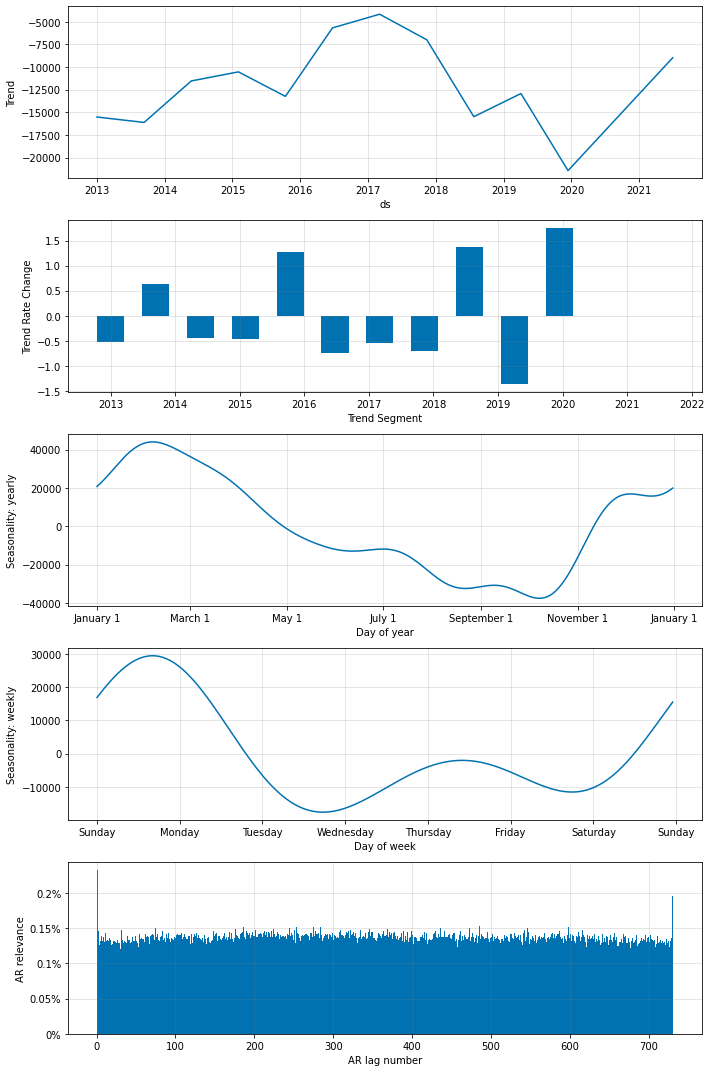

<Figure size 720x1080 with 5 Axes>

In [0]:
model.plot_parameters()

Out[17]:

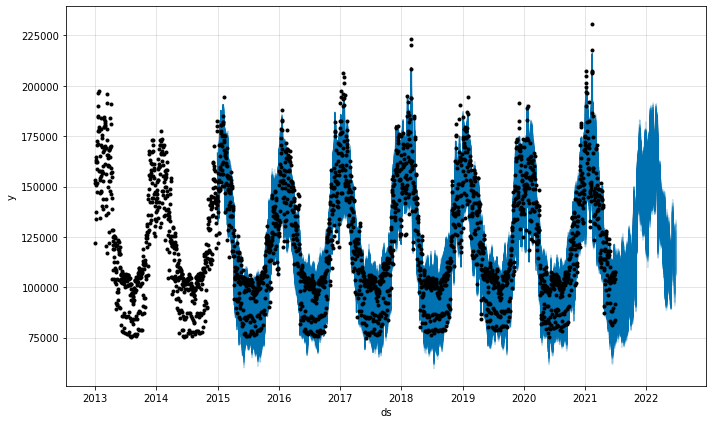

<Figure size 720x432 with 1 Axes>

In [0]:
model.plot(forecast)

In [0]:
forecast.tail(365)

Out[18]:

,ds,y,yhat1,residual1,yhat2,residual2,yhat3,residual3,yhat4,residual4,yhat5,residual5,yhat6,residual6,yhat7,residual7,yhat8,residual8,yhat9,residual9,yhat10,residual10,yhat11,residual11,yhat12,residual12,yhat13,residual13,yhat14,residual14,yhat15,residual15,yhat16,residual16,yhat17,residual17,yhat18,residual18,yhat19,residual19,...,ar329,ar330,ar331,ar332,ar333,ar334,ar335,ar336,ar337,ar338,ar339,ar340,ar341,ar342,ar343,ar344,ar345,ar346,ar347,ar348,ar349,ar350,ar351,ar352,ar353,ar354,ar355,ar356,ar357,ar358,ar359,ar360,ar361,ar362,ar363,ar364,ar365,trend,season_yearly,season_weekly
3103,2021-07-01,NaN,101508.757812,NaN,100890.859375,NaN,94846.695312,NaN,94511.5,NaN,95779.234375,NaN,95642.078125,NaN,94587.1875,NaN,97623.664062,NaN,97622.328125,NaN,98899.460938,NaN,95446.078125,NaN,97258.460938,NaN,100385.179688,NaN,100473.53125,NaN,97497.640625,NaN,95806.34375,NaN,97171.953125,NaN,99515.132812,NaN,97052.78125,NaN,...,131090.78125,132096.15625,135527.453125,133043.0,133091.234375,132361.1875,137294.828125,134134.3125,132574.078125,133234.921875,130746.148438,130550.679688,133460.140625,131642.859375,133111.828125,130180.757812,130131.039062,128321.109375,131090.0625,134455.109375,129657.765625,131662.390625,131269.921875,131754.703125,131978.703125,130588.78125,128989.632812,130363.914062,131091.90625,129692.3125,131375.71875,131478.8125,131024.46875,134159.109375,131204.640625,128843.3125,132286.140625,-8948.96875,-11887.407227,-4012.290283
3104,2021-07-02,NaN,None,NaN,98319.171875,NaN,99831.570312,NaN,97271.632812,NaN,98036.539062,NaN,96566.867188,NaN,97469.085938,NaN,96349.007812,NaN,97476.242188,NaN,97979.859375,NaN,101022.070312,NaN,102741.640625,NaN,96685.734375,NaN,101679.234375,NaN,100238.148438,NaN,97720.609375,NaN,95716.335938,NaN,97656.257812,NaN,99582.34375,NaN,...,136161.40625,134072.59375,135348.1875,137149.359375,135063.984375,134017.453125,133825.1875,135598.59375,135483.875,133816.140625,133015.234375,134646.765625,134628.109375,131220.75,132593.796875,132862.90625,134324.015625,137009.578125,136250.5625,131407.328125,134272.4375,136639.21875,132345.8125,136279.171875,135905.4375,134778.46875,133234.3125,134998.3125,130783.914062,132428.46875,134017.765625,135347.578125,133670.203125,133822.46875,131900.828125,132246.28125,134780.359375,-8926.84375,-11903.525391,-5595.402344
3105,2021-07-03,NaN,None,NaN,None,NaN,88659.859375,NaN,84559.976562,NaN,85177.734375,NaN,82781.578125,NaN,86340.679688,NaN,84059.90625,NaN,78778.078125,NaN,82300.28125,NaN,86447.359375,NaN,88102.15625,NaN,84991.539062,NaN,81396.476562,NaN,83986.515625,NaN,83490.0625,NaN,85618.234375,NaN,84867.164062,NaN,86709.664062,NaN,...,120681.84375,126680.445312,120508.5,120539.585938,124243.914062,126010.984375,122188.109375,118803.125,125355.03125,122625.070312,122716.476562,122014.0,121601.109375,120054.757812,121240.960938,123343.375,116978.570312,120131.414062,120045.046875,116997.953125,121704.023438,119733.65625,126098.273438,120277.53125,123523.28125,119469.023438,122111.351562,116604.84375,124331.210938,121811.976562,121545.289062,121012.953125,120707.757812,119352.757812,122320.828125,122472.109375,123594.65625,-8904.734375,-11942.103516,-10266.456055
3106,2021-07-04,NaN,None,NaN,None,NaN,None,NaN,84852.070312,NaN,80699.875,NaN,83623.015625,NaN,78158.9375,NaN,79009.515625,NaN,85599.953125,NaN,81845.351562,NaN,79622.875,NaN,79038.054688,NaN,81830.59375,NaN,81336.476562,NaN,83672.109375,NaN,86954.296875,NaN,84175.421875,NaN,84577.765625,NaN,80376.882812,NaN,...,90271.414062,87075.851562,84942.90625,83727.15625,87054.039062,86527.703125,86724.75,89579.726562,81409.171875,84758.578125,84412.34375,85111.960938,80004.976562,86869.40625,85750.640625,85892.734375,84630.34375,85754.09375,85971.03125,88310.507812,84345.898438,86968.476562,82066.109375,83967.34375,82732.640625,85961.070312,84543.789062,84977.445312,81879.460938,86793.445312,85010.96875,80898.609375,83030.507812,84132.484375,87739.742188,86155.976562,79093.507812,-8882.617188,-12005.0996